In [172]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd
import numpy as np
from joblib import dump
import matplotlib as plt

In [158]:
X_train = pd.read_csv("../../Split Data/Training Dataset/X_train (Undersample)#3.csv").drop(columns=["Unnamed: 0"])
y_train = pd.read_csv("../../Split Data/Training Dataset/y_train (Undersample)#3.csv", index_col=0)
X_test = pd.read_csv("../../Split Data/Testing Dataset/X_test (Undersample)#3.csv").drop(columns=["Unnamed: 0"])
y_test = pd.read_csv("../../Split Data/Testing Dataset/y_test (Undersample)#3.csv", index_col=0)
X_val = pd.read_csv("../../Split Data/Validation Dataset/X_val (Undersample)#3.csv").drop(columns=["Unnamed: 0"])
y_val = pd.read_csv("../../Split Data/Validation Dataset/y_val (Undersample)#3.csv", index_col=0)


In [159]:
model = LinearSVC(C= 1.0, dual=False, random_state = 10, max_iter=5000)

In [160]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_val_scaled = scaler.transform(X_val)   
X_test_scaled = scaler.transform(X_test) 

In [161]:
model.fit(X_train_scaled, y_train.values.ravel())

LinearSVC(dual=False, max_iter=5000, random_state=10)

In [162]:
val_accuracy = model.score(X_val_scaled, y_val)
print(val_accuracy)

0.6252872389317266


In [163]:
test_accuracy = model.score(X_test_scaled, y_test)
print(test_accuracy)

0.6234154187890161


In [164]:
actual_y = y_test.values.ravel()
pred_y = model.predict(X_test_scaled)

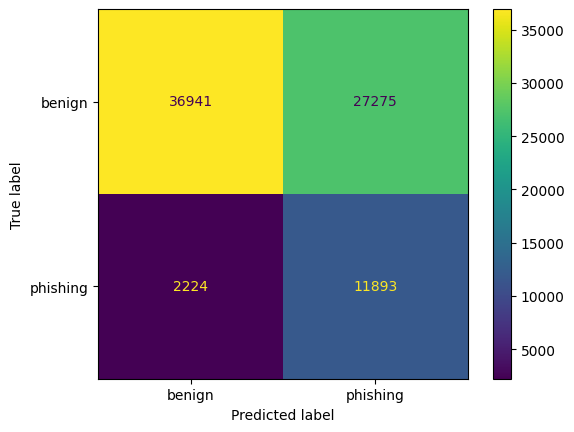

In [165]:
confusion_matrix = metrics.confusion_matrix(actual_y, pred_y)
matrix = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["benign", "phishing"])                            
matrix.plot()

In [166]:
Accuracy = metrics.accuracy_score(actual_y, pred_y)
Precision = metrics.precision_score(actual_y, pred_y)
Recall = metrics.recall_score(actual_y, pred_y)
F1_score = metrics.f1_score(actual_y, pred_y)

In [167]:
print({"Accuracy":Accuracy,"Precision":Precision,"Recall":Recall,"F1_score":F1_score})

{'Accuracy': 0.6234154187890161, 'Precision': 0.303640727124183, 'Recall': 0.8424594460579443, 'F1_score': 0.44639204278877725}


In [168]:
df = pd.DataFrame({"Model": "LinearSVC", "Accuracy": [Accuracy], "Precision":[Precision], "Recall": [Recall], "F1_score": [F1_score]})

In [169]:
df.head()

,Model,Accuracy,Precision,Recall,F1_score
0,LinearSVC,0.623415,0.303641,0.842459,0.446392


In [170]:
df.to_csv("Metrics of Dataset (Undersampling)#3.csv", index=False)

In [173]:
dump(model, 'LinearSVC (Undersampling) #3.joblib')

['LinearSVC (Undersampling) #3.joblib']